# Northwind Analysis

## Pre-Reqs
You will need to perform the following: <br>
<ul>
    <li>Install Microsoft SQL Server Management Studio: <a href="https://learn.microsoft.com/en-us/sql/ssms/download-sql-server-management-studio-ssms?view=sql-server-ver16">https://learn.microsoft.com/en-us/sql/ssms/download-sql-server-management-studio-ssms?view=sql-server-ver16</a> </li>
    <li>Create the Northwind Database: <a href="https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs">https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs"</a></li>
</ul>

In [1]:
import os
import sys
sys.path.append(os.path.realpath('.'))
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
from configuration.config import DB_HOST #you will need to create this. It is not recommended to store any server credentials in a Github repo

In [2]:
engine = create_engine(f"mssql+pymssql://{DB_HOST}/Northwind")

## Import all our data

In [3]:
customers = pd.read_sql("SELECT * FROM Customers", con = engine)
orders = pd.read_sql("SELECT * FROM Orders", con = engine)
order_details = pd.read_sql("SELECT * FROM [Order Details]", con = engine)
products = pd.read_sql("SELECT * FROM Products", con = engine)
categories= pd.read_sql("SELECT * FROM Categories", con = engine)

## sqldf
<p>sqldf is a great tool in Python for those that are fluent in SQL and would prefer to stay in the SQL realm of analyzing data. <br>
It is also a valuable tool for when certain operations are a little too complex to do in pandas alone such as: <br>
<ul>
    <li>Complicated merges</li>
    <li>Using Window functions</li>
    <li>Prototyping a view or stored proc</li>
</ul> <br>
<b>One important note: sqldf uses SQLite for its query syntax</b>
</p>

## Let's take a peek at our data

In [4]:
sqldf("""
    SELECT *
    FROM customers
    LIMIT 5
"""
     )

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [5]:
sqldf("""
    SELECT *
    FROM orders
    LIMIT 5
"""
     )

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04 00:00:00.000000,1996-08-01 00:00:00.000000,1996-07-16 00:00:00.000000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05 00:00:00.000000,1996-08-16 00:00:00.000000,1996-07-10 00:00:00.000000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08 00:00:00.000000,1996-08-05 00:00:00.000000,1996-07-12 00:00:00.000000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08 00:00:00.000000,1996-08-05 00:00:00.000000,1996-07-15 00:00:00.000000,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09 00:00:00.000000,1996-08-06 00:00:00.000000,1996-07-11 00:00:00.000000,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [6]:
sqldf("""
    SELECT *
    FROM order_details
    LIMIT 5
"""
     )

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [7]:
sqldf("""
    SELECT *
    FROM products
    LIMIT 5
"""
     )

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [8]:
sqldf("""
    SELECT *
    FROM categories
    LIMIT 5
"""
     )

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
2,3,Confections,"Desserts, candies, and sweet breads","b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\..."
3,4,Dairy Products,Cheeses,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...


## What is our data timeframe?
We can get this from our orders table

In [9]:
sqldf("""
SELECT 
    MIN(OrderDate) AS first_orderdate,
    MAX(OrderDate) AS last_orderdate
FROM 
    orders
"""
     )

,first_orderdate,last_orderdate
0,1996-07-04 00:00:00.000000,1998-05-06 00:00:00.000000


We have data from the 1996-1998 timeframe

## How many products did we sell by category during the entire timeframe?
Here is where the complicated joins criteria comes in. Rather than chain a lot of "merge" calls in pandas, <br>
we can complete what we can do in SQL code rather than pandas

In [10]:
sold_by_category_overall = sqldf("""
SELECT
    c.CategoryName,
    COUNT(od.OrderID) as items_sold
FROM
    order_details od
INNER JOIN products p
ON p.ProductID = od.ProductID
INNER JOIN categories c
ON c.CategoryID = p.CategoryID
GROUP BY
    c.CategoryName
"""
                                  )

In [11]:
sold_by_category_overall

,CategoryName,items_sold
0,Beverages,404
1,Condiments,216
2,Confections,334
3,Dairy Products,366
4,Grains/Cereals,196
5,Meat/Poultry,173
6,Produce,136
7,Seafood,330


We go to Order Details rather than Orders as an Order can have 1 or multiple items in it. We see over the time frame that beverages were the most sold product category

We can visualize this too

<Axes: title={'center': 'Products Sold by Category 1996-1998'}, xlabel='Category', ylabel='Products Sold'>

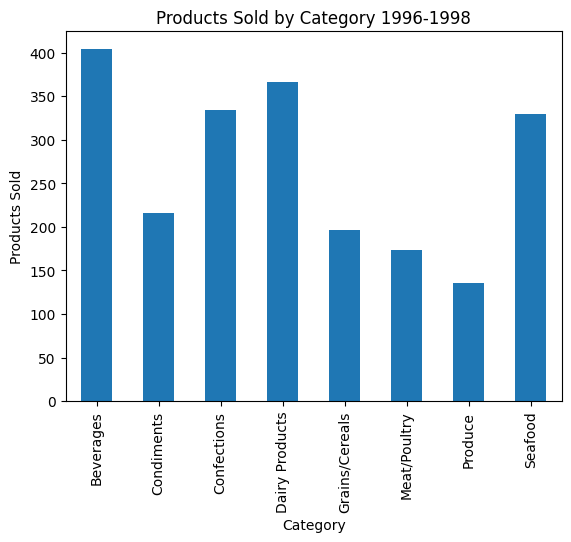

In [15]:
sold_by_category_overall.plot(x='CategoryName', y = 'items_sold', kind = 'bar', title = 'Products Sold by Category 1996-1998',
                              xlabel = 'Category', ylabel = 'Products Sold', rot = 90, legend=False)